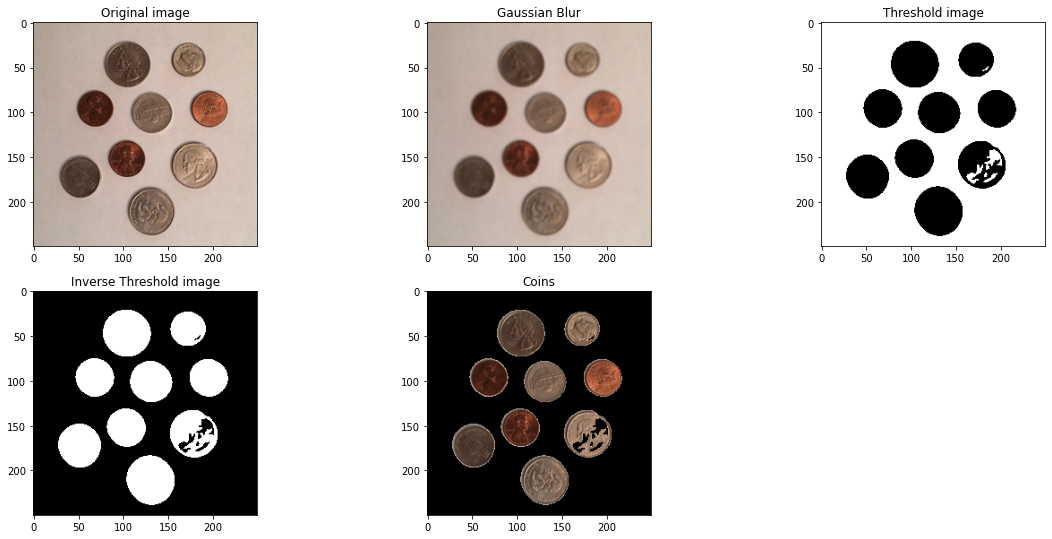

In [6]:
import cv2
from matplotlib import pyplot as plt

#Create path and read image
path = r'../images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#Blurred image using Gaussian Blur with kernel size = 5
#shifted = cv2.pyrMeanShiftFiltering(image, 20, 55)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

#Calculate threshold
#cv2.threshold input parameters
# first parameter is an input image
# second parameter is a threshold value
# third parameter is a maximum intensity value for pixel that have intensity over the threshold
# fouth parameter is a thresholding method for binary threshold, it mean that pexel value that greater than T are set to the maximum value 
gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)

#Calculate threshold for inverse picture
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)

#Bitwise AND operation with original image as mask
coins = cv2.bitwise_and(image, image, mask=threshInv)

#Plot image to Matplotlib
fig = plt.figure(figsize=(20, 14)) #create figure
fig.tight_layout(pad=3)
#Ax1
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title("Original image")
ax1.imshow(image)
#Ax2
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title("Gaussian Blur")
ax2.imshow(blurred, cmap='gray')
#Ax3
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title("Threshold image")
ax3.imshow(thresh, cmap='gray')
#Ax4
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title("Inverse Threshold image")
ax4.imshow(threshInv, cmap='gray')
#Ax5
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title("Coins")
ax5.imshow(coins)